In [1]:
import pandas as pd
import numpy as np
import glob
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebookº
%matplotlib inline

import warnings

In [3]:
prod = pd.read_excel('datos/datos_compras.xlsx', sheet_name = 'Productos')
boleta = pd.read_excel('datos/datos_compras.xlsx', sheet_name = 'Boletas Históricas')

In [4]:
prod

,Familia,Producto,Precio,Largo,Ancho
0,Aceites y grasas,Aceite,6455,5.9,2.4
1,Aceites y grasas,Aceite de oliva,7574,10.6,4.4
2,Aceites y grasas,Grasa comestible,600,13.1,11.1
3,Aceites y grasas,Manteca,5755,12.7,7.5
4,Aceites y grasas,Manteca de cerdo,6419,3.4,6.3
...,...,...,...,...,...
217,Limpieza del hogar,Limpiador líquido,5309,9.7,12.5
218,Limpieza del hogar,Limpiador lìquido piso,4534,10.5,0.6
219,Limpieza del hogar,Servilletas de papel,4951,5.5,12.3
220,Limpieza del hogar,Suavizante ropa,7260,8.2,8.9


In [5]:
boleta

,Boleta,Producto 1,Producto 2,Producto 3,Producto 4,Producto 5,Producto 6,Producto 7,Producto 8,Producto 9,Producto 10,Descuento,Valor Boleta
0,1,Jugo de fruta,Jerez,Manteca,-,-,-,-,-,-,-,0.00,19675.00
1,2,Leche ultrapasteurizada,Galletas,Almendras,-,-,-,-,-,-,-,0.04,12375.36
2,3,Tortilla de harina de trigo,Tomate,Mango,Flan,Mantequilla,Blanqueador,Naranja,-,-,-,0.00,33144.00
3,4,Agua con gas,Brócoli,Pimienta,Salsa de chile,Leche ultrapasteurizada,Mandarina,Betarraga,Salsa de soya,Rastrillos desechables,Almendras,0.00,51735.00
4,5,Yoghurt,Ciruela pasa,Filete de res,Leche evaporada,Toallita húmeda limpiadora,Jaiba,Rastrillos desechables,-,-,-,0.00,31093.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6094,6105,Jabón limpiador,Carnes molida de res,Pimienta,Cochinita pibil,-,-,-,-,-,-,0.08,17310.72
6095,6106,Avellana,Naranja,Rábano,Limón,Ajo,Pimienta,Durazno,-,-,-,0.13,33890.85
6096,6107,Mostaza,Leche ultrapasteurizada,Kiwi,Sidra,Harina hot cakes,Agua con gas,Queso mantecosi,-,-,-,0.00,39613.00
6097,6108,Pastel pimiento,Ciruela,Huachinango,Papa,Salsa picante,Pata de cerdo,-,-,-,-,0.00,20082.00


In [6]:
boleta.isna().sum()

Boleta          0
Producto 1      0
Producto 2      0
Producto 3      0
Producto 4      0
Producto 5      0
Producto 6      0
Producto 7      0
Producto 8      0
Producto 9      0
Producto 10     0
Descuento       0
Valor Boleta    0
dtype: int64

In [7]:
def cantidad(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10):
    productos = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
    i=0
    for producto in productos:
        if producto == '-':
            pass
        else:
            i+=1
    return i    

In [8]:
boleta["Cantidad"] = boleta.apply(lambda x: cantidad(x['Producto 1'],x['Producto 2'],x['Producto 3'],
                            x['Producto 4'],x['Producto 5'],x['Producto 6'],x['Producto 7'],x['Producto 8']
                            ,x['Producto 9'],x['Producto 10']),axis = 1)

In [9]:
boleta

,Boleta,Producto 1,Producto 2,Producto 3,Producto 4,Producto 5,Producto 6,Producto 7,Producto 8,Producto 9,Producto 10,Descuento,Valor Boleta,Cantidad
0,1,Jugo de fruta,Jerez,Manteca,-,-,-,-,-,-,-,0.00,19675.00,3
1,2,Leche ultrapasteurizada,Galletas,Almendras,-,-,-,-,-,-,-,0.04,12375.36,3
2,3,Tortilla de harina de trigo,Tomate,Mango,Flan,Mantequilla,Blanqueador,Naranja,-,-,-,0.00,33144.00,7
3,4,Agua con gas,Brócoli,Pimienta,Salsa de chile,Leche ultrapasteurizada,Mandarina,Betarraga,Salsa de soya,Rastrillos desechables,Almendras,0.00,51735.00,10
4,5,Yoghurt,Ciruela pasa,Filete de res,Leche evaporada,Toallita húmeda limpiadora,Jaiba,Rastrillos desechables,-,-,-,0.00,31093.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6094,6105,Jabón limpiador,Carnes molida de res,Pimienta,Cochinita pibil,-,-,-,-,-,-,0.08,17310.72,4
6095,6106,Avellana,Naranja,Rábano,Limón,Ajo,Pimienta,Durazno,-,-,-,0.13,33890.85,7
6096,6107,Mostaza,Leche ultrapasteurizada,Kiwi,Sidra,Harina hot cakes,Agua con gas,Queso mantecosi,-,-,-,0.00,39613.00,7
6097,6108,Pastel pimiento,Ciruela,Huachinango,Papa,Salsa picante,Pata de cerdo,-,-,-,-,0.00,20082.00,6


## Vamos a graficar el descuento contra el valor de la boleta, en un gráfico de dispersión


<Axes: xlabel='Descuento', ylabel='Valor Boleta'>

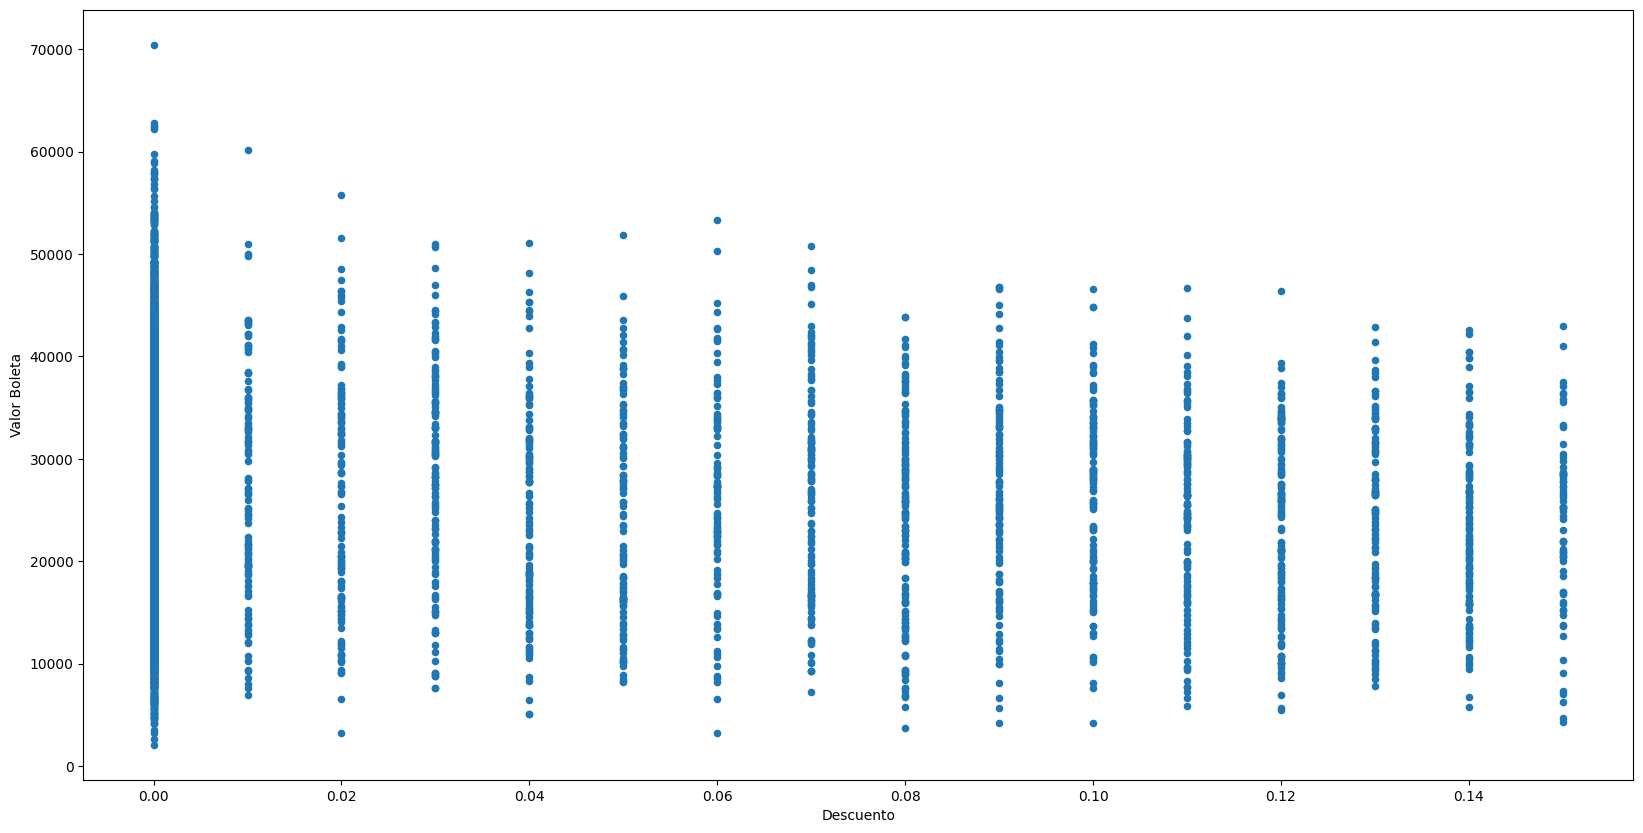

In [10]:
boleta.plot(x='Descuento', y='Valor Boleta', kind = 'scatter',figsize=(20, 10))

### Ahora, vamos a calcular la correlación entre valor boleta y descuento


In [11]:
boleta['Descuento'].corr(boleta['Valor Boleta'])

-0.104603062480548

### Qué se observa si graficamos el valor de la boleta contra la cantidad de productos en la boleta


<Axes: xlabel='Valor Boleta', ylabel='Cantidad'>

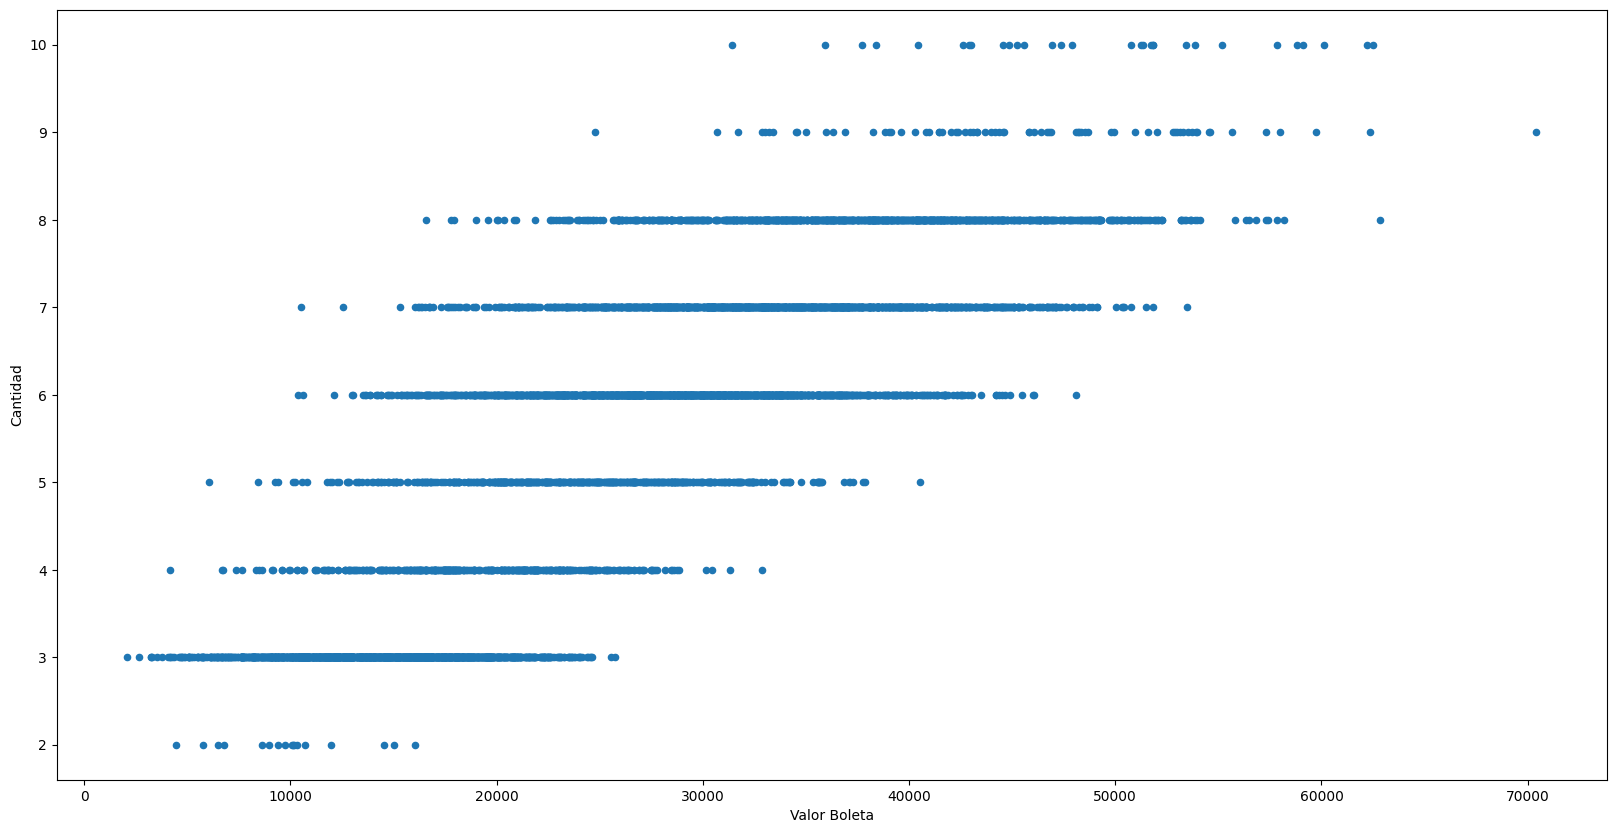

In [12]:
boleta.plot(x='Valor Boleta',y='Cantidad',kind='scatter', figsize= (20,10))

###  y qué observamos de su correlación

In [13]:
boleta['Cantidad'].corr(boleta['Valor Boleta'])

0.8225925153261343

### Calculemos el precio promedio y la desviación para la serie de precios de cada familia de productos


In [14]:
precio_prom = prod.groupby('Familia')['Precio'].mean().reset_index()
precio_prom = precio_prom.set_axis(['Familia', 'Precio Promedio'], axis='columns')
precio_prom

,Familia,Precio Promedio
0,Aceites y grasas,5982.571429
1,Bebidas,6241.300000
2,"Café, endulzantes y saborizantes",5281.250000
3,Carnes,4601.538462
4,Cereales,5853.000000
5,Condimentos y aderezos,4758.400000
6,Cuidado personal,4908.333333
7,Dulces y golosinas,4749.181818
8,Fiambrería,4881.181818
9,Frutas y verduras,4938.108696


In [15]:
precio_std = prod.groupby('Familia')['Precio'].std().reset_index()
precio_std = precio_prom.set_axis(['Familia', 'Desviación Precio'], axis='columns')
precio_std

,Familia,Desviación Precio
0,Aceites y grasas,5982.571429
1,Bebidas,6241.300000
2,"Café, endulzantes y saborizantes",5281.250000
3,Carnes,4601.538462
4,Cereales,5853.000000
5,Condimentos y aderezos,4758.400000
6,Cuidado personal,4908.333333
7,Dulces y golosinas,4749.181818
8,Fiambrería,4881.181818
9,Frutas y verduras,4938.108696


### y grafiquemos estos en un boxplot. ¿Qué podemos decir?

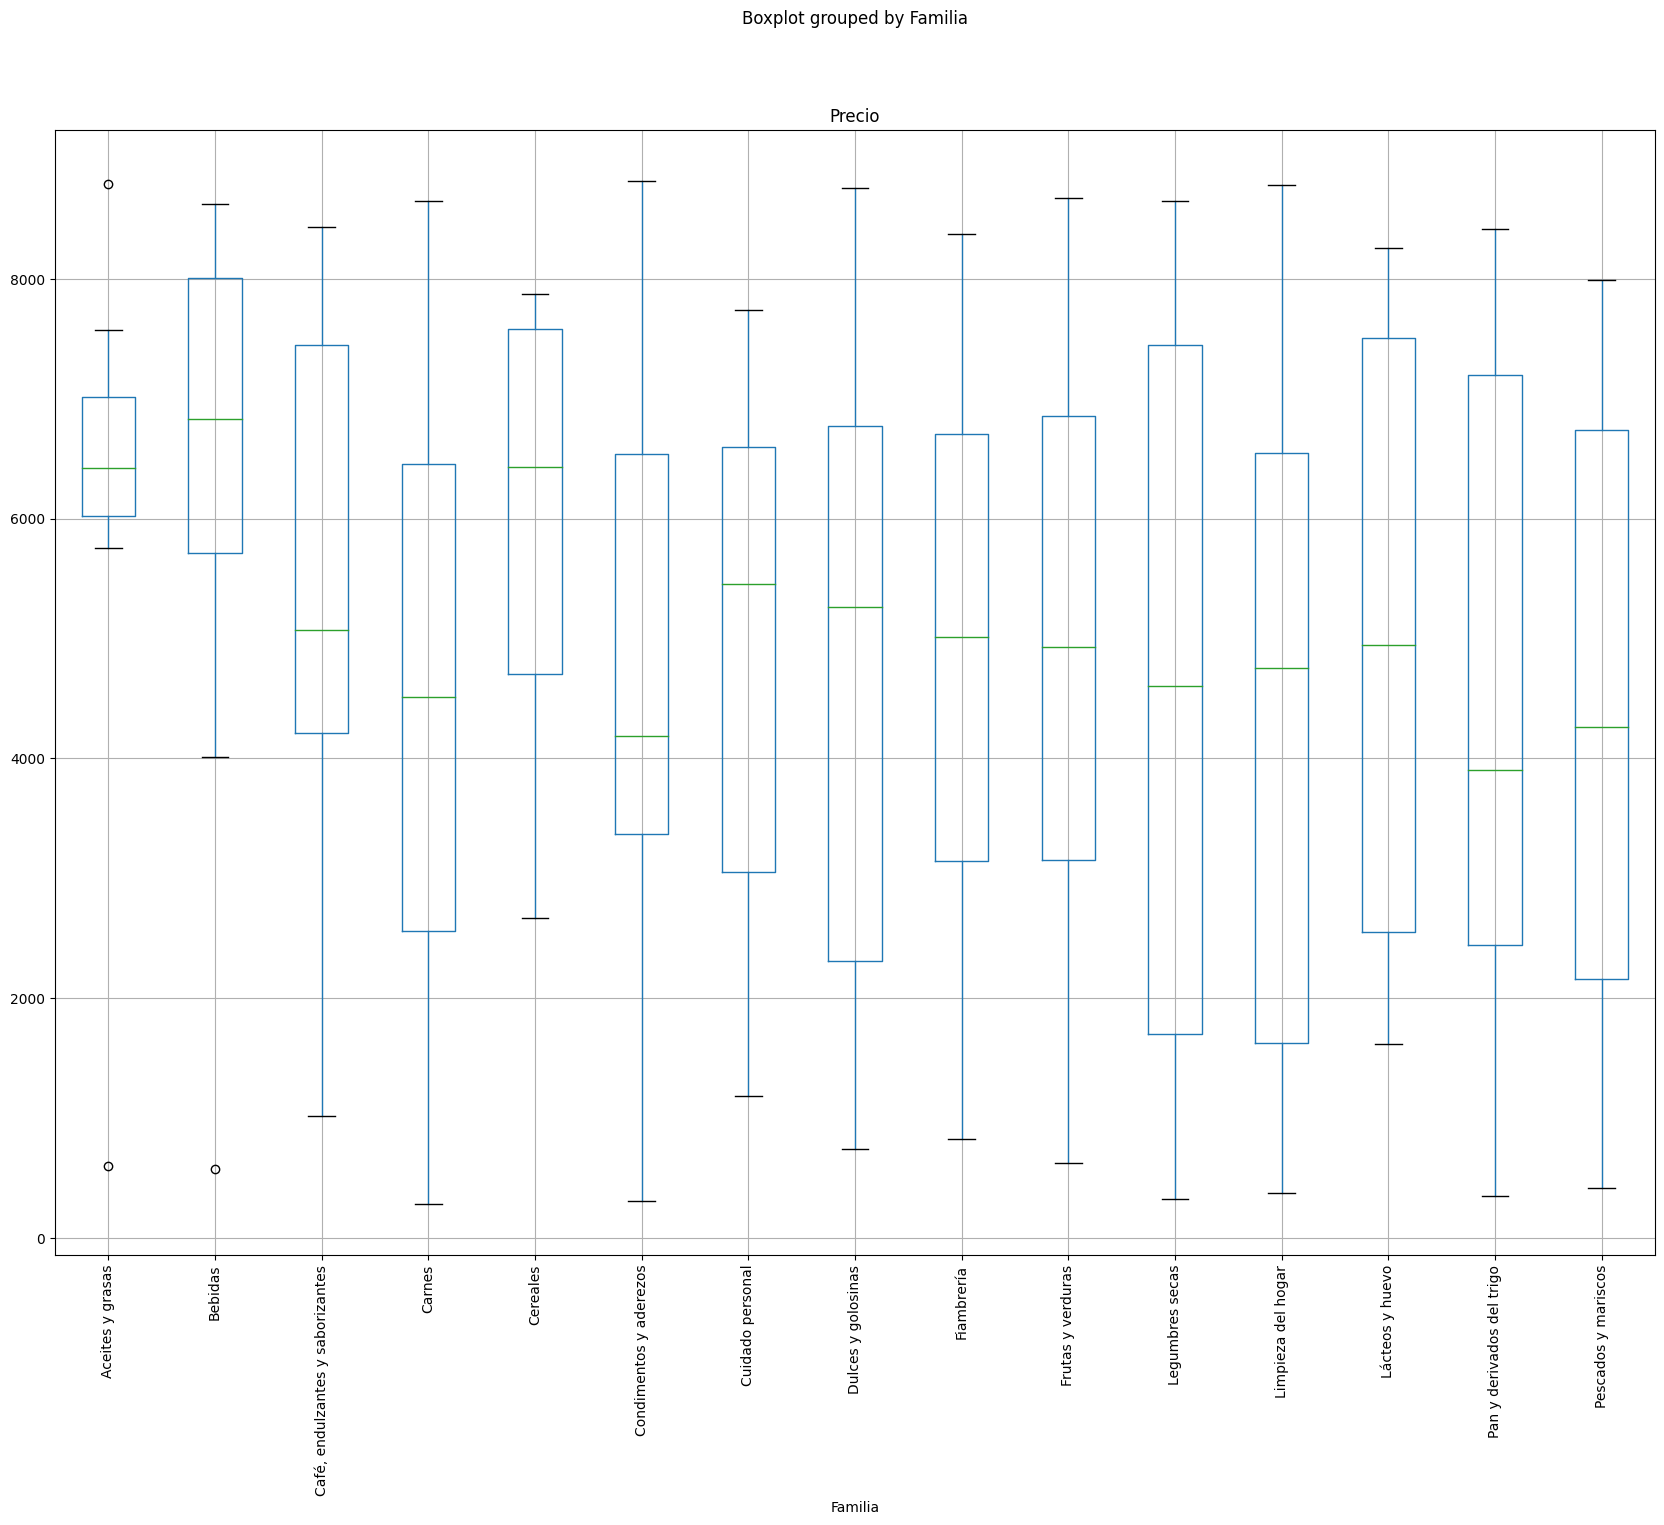

In [16]:
boxplot = prod.boxplot(column=['Precio'],by='Familia',figsize = (20,15),rot = 90)

### ¿Qué podríamos decir si agregamos a nuestro Dataframe de boletas históricas información sobre la cantidad de productos de cada familia que fueron adquiridos en cada boleta?

In [17]:
familia = prod['Familia'].unique().tolist()
familia

['Aceites y grasas',
 'Bebidas',
 'Café, endulzantes y saborizantes',
 'Carnes',
 'Cereales',
 'Condimentos y aderezos',
 'Dulces y golosinas',
 'Legumbres secas',
 'Pan y derivados del trigo',
 'Pescados y mariscos',
 'Frutas y verduras',
 'Lácteos y huevo',
 'Fiambrería',
 'Cuidado personal',
 'Limpieza del hogar']

Hacemos una función que calcula esta cantidad

In [18]:
def cantidad_fam(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,prod,lista_fam,family):
    cant_fam = {}
    for fam in lista_fam:
        cant_fam[fam] = 0
    productos = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
    for producto in productos:
        if producto != '-':
            pos = prod[prod['Producto']==producto].index.values[0]
            fami = prod.loc[pos,'Familia']
            cant_fam[fami] += 1
        elif producto == '-':
            break
    return cant_fam[family]

y utilizamos esta función sobre cada registro, de manera de generar nuevas columnas en nuestro Dataframe con esta información

In [19]:
for fam in familia:
    boleta[fam] = boleta.apply(lambda x: cantidad_fam(x['Producto 1'],x['Producto 2'],x['Producto 3'],
                            x['Producto 4'],x['Producto 5'],x['Producto 6'],x['Producto 7'],x['Producto 8']
                            ,x['Producto 9'],x['Producto 10'],prod,familia,fam),axis = 1)

In [20]:
boleta

,Boleta,Producto 1,Producto 2,Producto 3,Producto 4,Producto 5,Producto 6,Producto 7,Producto 8,Producto 9,...,Condimentos y aderezos,Dulces y golosinas,Legumbres secas,Pan y derivados del trigo,Pescados y mariscos,Frutas y verduras,Lácteos y huevo,Fiambrería,Cuidado personal,Limpieza del hogar
0,1,Jugo de fruta,Jerez,Manteca,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
1,2,Leche ultrapasteurizada,Galletas,Almendras,-,-,-,-,-,-,...,0,0,0,1,0,1,1,0,0,0
2,3,Tortilla de harina de trigo,Tomate,Mango,Flan,Mantequilla,Blanqueador,Naranja,-,-,...,0,1,0,1,0,3,1,0,0,1
3,4,Agua con gas,Brócoli,Pimienta,Salsa de chile,Leche ultrapasteurizada,Mandarina,Betarraga,Salsa de soya,Rastrillos desechables,...,3,0,0,0,0,4,1,0,1,0
4,5,Yoghurt,Ciruela pasa,Filete de res,Leche evaporada,Toallita húmeda limpiadora,Jaiba,Rastrillos desechables,-,-,...,0,0,0,0,1,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6094,6105,Jabón limpiador,Carnes molida de res,Pimienta,Cochinita pibil,-,-,-,-,-,...,2,0,0,0,0,0,0,0,0,1
6095,6106,Avellana,Naranja,Rábano,Limón,Ajo,Pimienta,Durazno,-,-,...,1,0,0,0,0,6,0,0,0,0
6096,6107,Mostaza,Leche ultrapasteurizada,Kiwi,Sidra,Harina hot cakes,Agua con gas,Queso mantecosi,-,-,...,1,0,0,1,0,1,2,0,0,0
6097,6108,Pastel pimiento,Ciruela,Huachinango,Papa,Salsa picante,Pata de cerdo,-,-,-,...,1,0,0,0,1,2,0,1,0,0
